<h1 align=center><font size=5>Chronic Kidney Disease (CKD)</font></h1>

## Predictive Model <a id = 'stats_func'></a>

### Using the longitudinal data of different lab measurements and the time it got conducted<a id = 'avg_measure'></a>

#### Path

The path to the current opened notebook.

In [1]:
import os
os.getcwd()
#os.chdir('../../../Desktop/Lucas_PostDoc/')
#os.getcwd()

'C:\\Users\\jetin\\Desktop\\Holmusk_Interview'

#### Packages needed

The packages is loaded which will be useful in the analysis.

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

#### Data File loaded

The data file containing the longitudinal data of lab measurements and its time is loaded here and the information in the file is displayed.

In [4]:
nRowsRead = 2000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./dataScienceTask/T_creatinine.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'T_creatinine.csv'
nRow_tn, nCol_tn = df1.shape
print("----------------------------------------------------")
print(f'There are {nRow_tn} rows and {nCol_tn} columns for creatinine')
print(df1.describe())
print("----------------------------------------------------")

nRowsRead = 2000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('./dataScienceTask/T_DBP.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'T_DBP.csv'
nRow_tn, nCol_tn = df2.shape
print(f'There are {nRow_tn} rows and {nCol_tn} columns for DBP')
print(df2.describe())
print("----------------------------------------------------")

nRowsRead = 2000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('./dataScienceTask/T_glucose.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'T_glucose.csv'
nRow_tn, nCol_tn = df3.shape
print(f'There are {nRow_tn} rows and {nCol_tn} columns for glucose')
print(df3.describe())
print("----------------------------------------------------")

nRowsRead = 3000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df4 = pd.read_csv('./dataScienceTask/T_HGB.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'T_HGB.csv'
nRow_tn, nCol_tn = df4.shape
print(f'There are {nRow_tn} rows and {nCol_tn} columns for HGB')
print(df4.describe())
print("----------------------------------------------------")

nRowsRead = 3000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df5 = pd.read_csv('./dataScienceTask/T_ldl.csv', delimiter=',', nrows = nRowsRead)
df5.dataframeName = 'T_ldl.csv'
nRow_tn, nCol_tn = df5.shape
print(f'There are {nRow_tn} rows and {nCol_tn} columns for ldl')
print(df5.describe())
print("----------------------------------------------------")

nRowsRead = 2000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df6 = pd.read_csv('./dataScienceTask/T_SBP.csv', delimiter=',', nrows = nRowsRead)
df6.dataframeName = 'T_SBP.csv'
nRow_tn, nCol_tn = df6.shape
print(f'There are {nRow_tn} rows and {nCol_tn} columns for SBP')
print(df6.describe())
print("----------------------------------------------------")

----------------------------------------------------
There are 1439 rows and 3 columns for creatinine
                id        value         time
count  1439.000000  1439.000000  1439.000000
mean    148.706046     1.328999   293.828353
std      87.180040     0.357971   223.600131
min       0.000000     0.240000     0.000000
25%      73.500000     1.080000    84.000000
50%     149.000000     1.290000   296.000000
75%     225.000000     1.530000   488.500000
max     299.000000     3.020000   699.000000
----------------------------------------------------
There are 1821 rows and 3 columns for DBP
                id        value         time
count  1821.000000  1821.000000  1821.000000
mean    149.403624    79.518583   305.311917
std      87.045934    10.178676   221.674079
min       0.000000    44.950000     0.000000
25%      74.000000    72.830000    97.000000
50%     150.000000    79.050000   301.000000
75%     226.000000    86.170000   496.000000
max     299.000000   112.930000   699.

#### Data File loaded

The data file containing the output information is loaded here whether the considered patient will progress in CKD or not.

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Hourly-test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df7 = pd.read_csv('./dataScienceTask/T_stage.csv', delimiter=',', nrows = nRowsRead)
df7.dataframeName = 'T_stage.csv'
nRow_tn, nCol_tn = df7.shape
print("----------------------------------------------------")
print(f'There are {nRow_tn} rows and {nCol_tn} columns for stage progress')
print(df7['Stage_Progress'].value_counts())
print("----------------------------------------------------")

----------------------------------------------------
There are 300 rows and 2 columns for stage progress
False    200
True     100
Name: Stage_Progress, dtype: int64
----------------------------------------------------


#### Distributions through Bar Graphs

The bar graphs representing the distributions of the lab measurements and its time on the patients.  

----------------------------------------------------
Mean for time of creatinine :  163.15
Std dev. for time of creatinine :  95.9967751194452
Mean for values of creatinine :  1.3100999999999998
Std dev. for values of creatinine :  0.348463757082426
----------------------------------------------------
Mean for time of DBP :  129.0
Std dev. for time of DBP :  85.0223892081766
Mean for values of DBP :  80.07826666666668
Std dev. for values of DBP :  10.5586418158566
----------------------------------------------------
Mean for time of glucose :  144.48
Std dev. for time of glucose :  104.58280419520855
Mean for values of glucose :  6.6357
Std dev. for values of glucose :  1.521691551092621
----------------------------------------------------
Mean for time of HGB :  236.55666666666667
Std dev. for time of HGB :  157.6321248632045
Mean for values of HGB :  14.033966666666664
Std dev. for values of HGB :  1.5852465419892545
----------------------------------------------------
Mean for time 

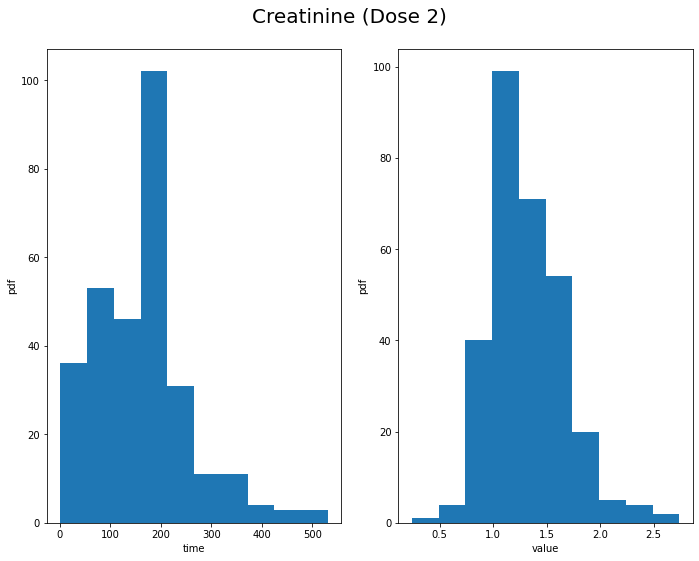

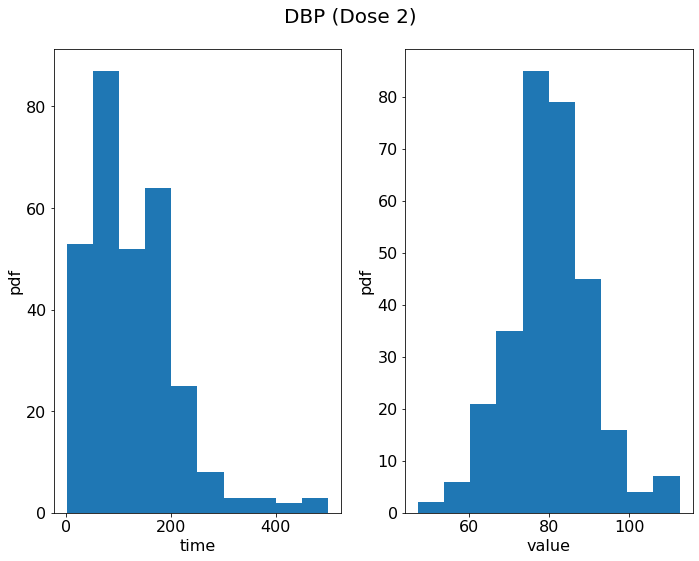

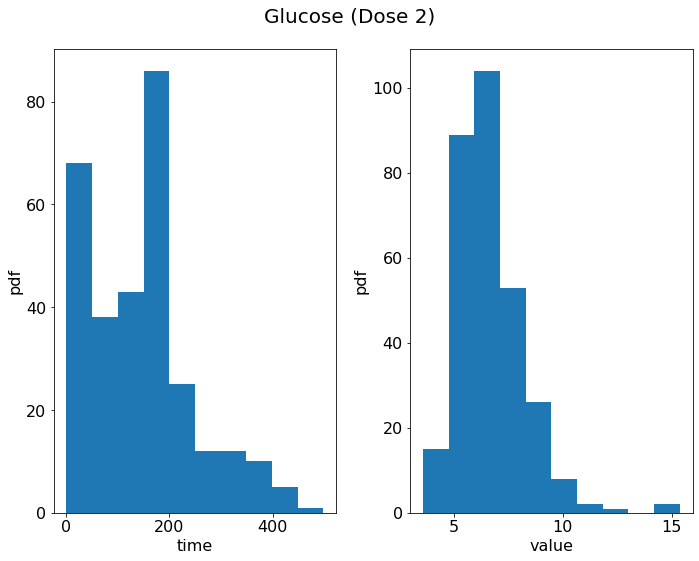

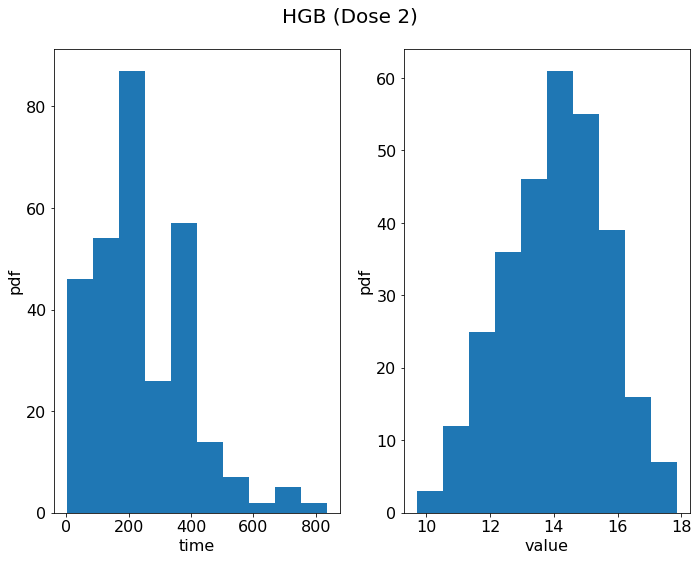

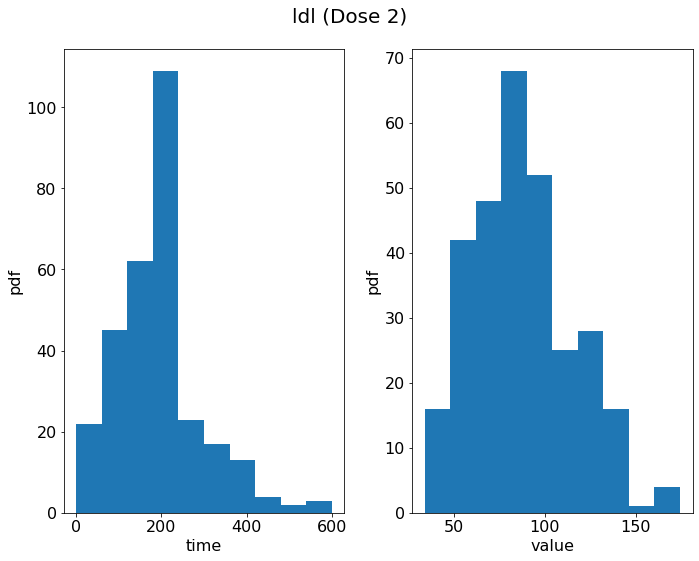

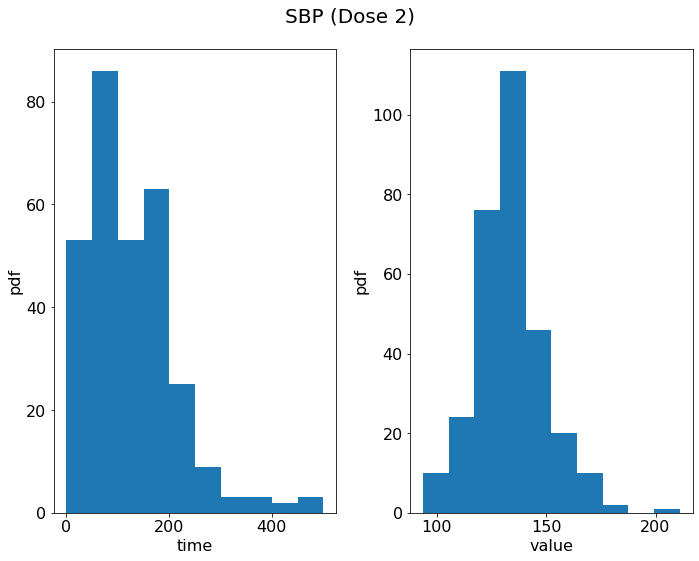

In [6]:
tot_persons=300
index1 = 1

time_creatinine = -np.ones((tot_persons, 25))
value_creatinine = -np.ones((tot_persons, 25))
dosage_creatinine = []
list_time = df1['time']
list_val = df1['value']
for person in range(0,tot_persons): 
    list4 = df1.index[df1['id'] == person].tolist()
    dosage_creatinine = np.append(dosage_creatinine,len(list4))
    for index in range(len(list4)):
        time_creatinine[person][index] = list_time[list4[index]]
        value_creatinine[person][index] = list_val[list4[index]]      
list_time = []
list_val = []
for i in range(tot_persons):
    if(time_creatinine[i][index1]>=0):
        list_time = np.append(list_time,time_creatinine[i][index1])
    if(value_creatinine[i][index1]>=0):
        list_val = np.append(list_val,value_creatinine[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "Creatinine (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "Creatinine (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('Creatinine (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_Creatinine_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("----------------------------------------------------")
print("Mean for time of creatinine : ", np.mean(y_time))
print("Std dev. for time of creatinine : ", np.std(y_time))
print("Mean for values of creatinine : ", np.mean(y_val))
print("Std dev. for values of creatinine : ", np.std(y_val))
print("----------------------------------------------------")

time_DBP = -np.ones((tot_persons, 25))
value_DBP = -np.ones((tot_persons, 25))
dosage_DBP = []
list_time = df2['time']
list_val = df2['value']
for person in range(0,tot_persons): 
    list4 = df2.index[df2['id'] == person].tolist()
    dosage_DBP = np.append(dosage_DBP,len(list4))
    for index in range(len(list4)):
        time_DBP[person][index] = list_time[list4[index]]
        value_DBP[person][index] = list_val[list4[index]]

list_time = []
list_val = []
for i in range(tot_persons):
    if(time_DBP[i][index1]>=0):
        list_time = np.append(list_time,time_DBP[i][index1])
    if(value_DBP[i][index1]>=0):
        list_val = np.append(list_val,value_DBP[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "DBP (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "DBP (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('DBP (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_DBP_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("Mean for time of DBP : ", np.mean(y_time))
print("Std dev. for time of DBP : ", np.std(y_time))
print("Mean for values of DBP : ", np.mean(y_val))
print("Std dev. for values of DBP : ", np.std(y_val))
print("----------------------------------------------------")

time_glucose = -np.ones((tot_persons, 25))
value_glucose = -np.ones((tot_persons, 25))
dosage_glucose = []
list_time = df3['time']
list_val = df3['value']
for person in range(0,tot_persons): 
    list4 = df3.index[df3['id'] == person].tolist()
    dosage_glucose = np.append(dosage_glucose,len(list4))
    for index in range(len(list4)):
        time_glucose[person][index] = list_time[list4[index]]
        value_glucose[person][index] = list_val[list4[index]]

list_time = []
list_val = []
for i in range(tot_persons):
    if(time_glucose[i][index1]>=0):
        list_time = np.append(list_time,time_glucose[i][index1])
    if(value_glucose[i][index1]>=0):
        list_val = np.append(list_val,value_glucose[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "Glucose (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "Glucose (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('Glucose (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_Glucose_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("Mean for time of glucose : ", np.mean(y_time))
print("Std dev. for time of glucose : ", np.std(y_time))
print("Mean for values of glucose : ", np.mean(y_val))
print("Std dev. for values of glucose : ", np.std(y_val))
print("----------------------------------------------------")

time_HGB = -np.ones((tot_persons, 25))
value_HGB = -np.ones((tot_persons, 25))
dosage_HGB = []
list_time = df4['time']
list_val = df4['value']
for person in range(0,tot_persons): 
    list4 = df4.index[df4['id'] == person].tolist()
    dosage_HGB = np.append(dosage_HGB,len(list4))
    for index in range(len(list4)):
        time_HGB[person][index] = list_time[list4[index]]
        value_HGB[person][index] = list_val[list4[index]]

list_time = []
list_val = []
for i in range(tot_persons):
    if(time_HGB[i][index1]>=0):
        list_time = np.append(list_time,time_HGB[i][index1])
    if(value_HGB[i][index1]>=0):
        list_val = np.append(list_val,value_HGB[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "HGB (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "HGB (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('HGB (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_HGB_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("Mean for time of HGB : ", np.mean(y_time))
print("Std dev. for time of HGB : ", np.std(y_time))
print("Mean for values of HGB : ", np.mean(y_val))
print("Std dev. for values of HGB : ", np.std(y_val))
print("----------------------------------------------------")

time_1dl = -np.ones((tot_persons, 25))
value_1dl = -np.ones((tot_persons, 25))
dosage_1dl = []
list_time = df5['time']
list_val = df5['value']
for person in range(0,tot_persons): 
    list4 = df5.index[df5['id'] == person].tolist()
    dosage_1dl = np.append(dosage_1dl,len(list4))
    for index in range(len(list4)):
        time_1dl[person][index] = list_time[list4[index]]
        value_1dl[person][index] = list_val[list4[index]]

list_time = []
list_val = []
for i in range(tot_persons):
    if(time_1dl[i][index1]>=0):
        list_time = np.append(list_time,time_1dl[i][index1])
    if(value_1dl[i][index1]>=0):
        list_val = np.append(list_val,value_1dl[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "1dl (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "1dl (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('ldl (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_ldl_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("Mean for time of 1dl : ", np.mean(y_time))
print("Std dev. for time of 1dl : ", np.std(y_time))
print("Mean for values of 1dl : ", np.mean(y_val))
print("Std dev. for values of 1dl : ", np.std(y_val))
print("----------------------------------------------------")

time_SBP = -np.ones((tot_persons, 25))
value_SBP = -np.ones((tot_persons, 25))
dosage_SBP = []
list_time = df6['time']
list_val = df6['value']
for person in range(0,tot_persons): 
    list4 = df6.index[df6['id'] == person].tolist()
    dosage_SBP = np.append(dosage_SBP,len(list4))
    for index in range(len(list4)):
        time_SBP[person][index] = list_time[list4[index]]
        value_SBP[person][index] = list_val[list4[index]]

list_time = []
list_val = []
for i in range(tot_persons):
    if(time_SBP[i][index1]>=0):
        list_time = np.append(list_time,time_SBP[i][index1])
    if(value_SBP[i][index1]>=0):
        list_val = np.append(list_val,value_SBP[i][index1])    
        
y_time = np.asarray([list_time[i] for i in range(0,len(list_time))])
y_val = np.asarray([list_val[i] for i in range(0,len(list_val))])

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8))
# Set general font size
plt.rcParams['font.size'] = '16'
axes[0].hist(y_time, label = "SBP (Time)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("pdf")
axes[1].hist(y_val, label = "SBP (Value)")   
axes[1].set_xlabel("value")
axes[1].set_ylabel("pdf")
plt.suptitle('SBP (Dose '+str(index1+1)+')',fontsize=20)
# plt.savefig("./Dist_SBP_Dose2.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
figure.tight_layout()

print("Mean for time of SBP : ", np.mean(y_time))
print("Std dev. for time of SBP : ", np.std(y_time))
print("Mean for values of SBP : ", np.mean(y_val))
print("Std dev. for values of SBP : ", np.std(y_val))
print("----------------------------------------------------")

#### Functions for Correlation Matrix

The following functions are defined for computing the correlations between different variables.  

In [22]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

def plotScatterMatrix(df, plotSize, textSize,A):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=1, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.setp(ax[0,0].yaxis.get_majorticklabels(), 'size', 15)
    plt.setp(ax[1,0].xaxis.get_majorticklabels(), 'size', 15)
    plt.setp(ax[1,0].yaxis.get_majorticklabels(), 'size', 15)
    plt.setp(ax[1,1].xaxis.get_majorticklabels(), 'size', 15)
    plt.suptitle('Scatter and Density Plot ('+str(A)+')')
#     plt.savefig("./ScatterMatrix_SBP_NumbDosDiagCKD.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
    plt.show()    

#### Table and Scatter Matrix for number of doses

A table consisting of number of doses of a particular item is taken with the outcome whether the same patient progressed in CKD or not.

--------------------SBP--------------------------
     Number of times  Stage Progress
0                8.0             1.0
1                7.0             0.0
2                4.0             1.0
3                7.0             0.0
4                7.0             1.0
..               ...             ...
295              8.0             1.0
296              7.0             0.0
297              8.0             1.0
298              4.0             0.0
299              7.0             0.0

[300 rows x 2 columns]
---------------------------------------------------


C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


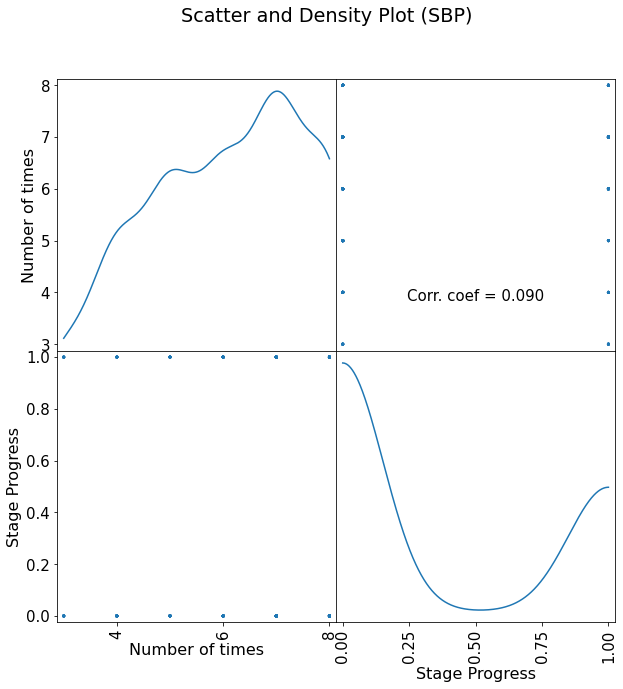

In [23]:
list4 = df7[df7.columns[1]]
y = np.asarray([list4[i] for i in range(0,len(list4))])
y=y.astype(np.float32)
A = "SBP"
data = {'Number of times': dosage_SBP, 'Stage Progress': y}
table = pd.DataFrame(data=data)
table.dataframeName = 'Dosage'
print('--------------------'+A+"--------------------------")
print(table)
print('---------------------------------------------------')
plotScatterMatrix(table, 10, 15,A)

#### Matrix consisting of the lab measurements and the conducted time.

A matrix consisting of the lab measurements and the time this measurment is conducted for each person 
in a row of this matrix.

In [6]:
tot_persons=300
data = -np.ones((tot_persons, 3+50*6))
index1 = 0

# C = df.race.unique()
# D = df.gender.unique()

# for i in range(len(C)):
#     df[['race']] = df[['race']].replace(to_replace = C[i], value = i)
      
# for i in range(len(D)):
#     df[['gender']] = df[['gender']].replace(to_replace = D[i], value = i)
        
# print(df)

# list_race = df['race']
# list_gender = df['gender']
# list_age = df['age']
# for person in range(0,tot_persons): 
#     list4 = df.index[df['id'] == person].tolist()
#     for index in range(len(list4)):
#         data[person][0] = list_race[list4[index]]
#         data[person][1] = list_gender[list4[index]]   
#         data[person][2] = list_age[list4[index]]
        
list_time = df1['time']
list_val = df1['value']
for person in range(0,tot_persons): 
    list4 = df1.index[df1['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+index] = list_time[list4[index]]
        data[person][index1+index+25] = list_val[list4[index]]    
        
list_time = df2['time']
list_val = df2['value']
for person in range(0,tot_persons): 
    list4 = df2.index[df2['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+50+index] = list_time[list4[index]]
        data[person][index1+50+index+25] = list_val[list4[index]]    
        
list_time = df3['time']
list_val = df3['value']
for person in range(0,tot_persons): 
    list4 = df3.index[df3['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+50*2+index] = list_time[list4[index]]
        data[person][index1+50*2+index+25] = list_val[list4[index]]    
        
list_time = df4['time']
list_val = df4['value']
for person in range(0,tot_persons): 
    list4 = df4.index[df4['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+50*3+index] = list_time[list4[index]]
        data[person][index1+50*3+index+25] = list_val[list4[index]]            
        
list_time = df5['time']
list_val = df5['value']
for person in range(0,tot_persons): 
    list4 = df5.index[df5['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+50*4+index] = list_time[list4[index]]
        data[person][index1+50*4+index+25] = list_val[list4[index]]       
        
list_time = df6['time']
list_val = df6['value']
for person in range(0,tot_persons): 
    list4 = df6.index[df6['id'] == person].tolist()
    for index in range(len(list4)):
        data[person][index1+50*5+index] = list_time[list4[index]]
        data[person][index1+50*5+index+25] = list_val[list4[index]]

print("------------------------------------------------------------")        
print(data) 
print("------------------------------------------------------------")

S = np.sum(data,0)
S_index = np.where(S == -300)
#print(S)
print(S_index)
print("------------------------------------------------------------")
data = np.delete(data,S_index,1)
print(data)
print("------------------------------------------------------------")
S = np.sum(data,0)
S_index = np.where(S == -300)
#print(S)
#print(S_index)

------------------------------------------------------------
[[  0. 107. 286. ...  -1.  -1.  -1.]
 [  0.  68. 289. ...  -1.  -1.  -1.]
 [  0. 184. 430. ...  -1.  -1.  -1.]
 ...
 [  0. 117. 303. ...  -1.  -1.  -1.]
 [  0.  86. 217. ...  -1.  -1.  -1.]
 [  0. 531. 652. ...  -1.  -1.  -1.]]
------------------------------------------------------------
(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 172, 173, 174, 197, 198, 199, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 233, 234,
 

#### Standardization of the data along the row

The data is standardized using StandardScaler or MinMaxScaler along the row before inputting the data into the neural network.

In [7]:
scaler = StandardScaler().fit(data.T)

A = scaler.transform(data.T)

data = A.T
print("------------------------------------------------------------")
print(data.shape)
print("------------------------------------------------------------")
print(data[0])
print("------------------------------------------------------------")

------------------------------------------------------------
(300, 134)
------------------------------------------------------------
[-0.566938   -0.130906    0.5985307   0.98973698  1.79659992  2.23670698
 -0.57101306 -0.57101306 -0.57101306 -0.57101306 -0.56168116 -0.56225167
 -0.5610699  -0.56192567 -0.56253693 -0.56192567 -0.57101306 -0.57101306
 -0.57101306 -0.57101306 -0.566938   -0.16758159  0.57000524  0.98158685
  1.36871806  1.79659992  2.19595633  2.20003139 -0.57101306 -0.57101306
 -0.57101306 -0.17850276 -0.22471401 -0.29810593 -0.22703679 -0.2148931
 -0.20979927 -0.24749362 -0.22345074 -0.57101306 -0.57101306 -0.57101306
 -0.566938   -0.130906    0.5985307   0.98973698  1.79659992  2.23670698
 -0.57101306 -0.57101306 -0.54150959 -0.53759753 -0.53837179 -0.5388608
 -0.54403613 -0.54338412 -0.57101306 -0.57101306 -0.566938   -0.130906
  0.5985307   0.98973698  2.23670698  2.62383819  3.04764499  3.81783235
  4.30684019 -0.57101306 -0.57101306 -0.57101306 -0.57101306 -0.5710

#### Splitting and preprocessing the Matrix

The constructed matrix from lab measurements and the time is split into training and testing input set.   
Similarly, the data on the patient will progress in CKD or not is converted to 1 and 0 respectively and then the data is split into training and testing output set.

In [8]:
labels=data
features = df7[['Stage_Progress']].astype(np.float32)

#one_hot_encoded_data = pd.get_dummies(df8[['Stage_Progress']], columns = ['Stage_Progress'])
#print(one_hot_encoded_data)

#features = one_hot_encoded_data.astype(np.float32)



X_train, X_test, y_train, y_test = train_test_split(labels, features, test_size=0.1, random_state=42) 

print("------------------------------------------------------------")
print(y_test)
print("------------------------------------------------------------")

------------------------------------------------------------
     Stage_Progress
203             0.0
266             0.0
152             0.0
9               0.0
233             0.0
226             0.0
196             0.0
109             1.0
5               0.0
175             0.0
237             1.0
57              1.0
218             1.0
45              1.0
182             1.0
221             1.0
289             0.0
211             0.0
148             0.0
165             1.0
78              0.0
113             1.0
249             0.0
250             0.0
104             1.0
42              1.0
281             1.0
295             1.0
157             0.0
238             0.0
------------------------------------------------------------


#### Standardization of the data

The data is standardized using StandardScaler or MinMaxScaler before inputting the data into the neural network.

In [9]:
scaler = StandardScaler().fit(X_train)

A = scaler.transform(X_train)

B = scaler.transform(X_test)  

X_train = A

X_test = B

print("------------------------------------------------------------")
print(X_train)
print("------------------------------------------------------------")

------------------------------------------------------------
[[-0.96508906 -1.35493188 -0.60816634 ...  1.21516779  1.23043748
   3.04946829]
 [-1.54940655 -0.05218043 -1.06496651 ...  0.84728914  1.43105224
   2.26937296]
 [ 0.16129715 -0.67460168 -0.25361501 ...  1.06044827 -0.93204384
  -0.48024629]
 ...
 [-1.45164447  0.92349157 -0.38692475 ...  0.01645836  0.40248734
  -1.027175  ]
 [ 1.67624698  2.40085827  2.8062852  ... -0.91845722 -0.55140706
   0.03527006]
 [-0.64092885 -0.06051569 -0.02812783 ...  0.56515598  0.84027769
  -0.75400825]]
------------------------------------------------------------


#### Neural Network 1 (Logistic Regression)

The basic architecture of neural network based on logistic regression.

In [17]:
print("------------------------------------------------------------")
model = Sequential()

model.add(Dense(1000, activation='sigmoid', kernel_regularizer=L1L2(l1=0.0, l2=1.1), input_shape=(134,)))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.summary()
print("------------------------------------------------------------")

------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              135000    
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1001      
Total params: 2,138,001
Trainable params: 2,138,001
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------


#### Compiling the Neural Network 1

The compilation of the neural network using loss function as binary crossentropy, optimizer as adam and using accuracy as metric to test the performance of the network.

In [19]:
print("------------------------------------------------------------")
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)
print("------------------------------------------------------------")

------------------------------------------------------------
Epoch 1/20
270/270 [==============================] - 10s 39ms/step - loss: 5.2374 - acc: 0.6185
Epoch 2/20
270/270 [==============================] - 10s 38ms/step - loss: 0.6961 - acc: 0.6259
Epoch 3/20
270/270 [==============================] - 10s 36ms/step - loss: 0.6968 - acc: 0.6222
Epoch 4/20
270/270 [==============================] - 10s 37ms/step - loss: 0.6975 - acc: 0.6185
Epoch 5/20
270/270 [==============================] - 10s 36ms/step - loss: 0.6903 - acc: 0.6296
Epoch 6/20
270/270 [==============================] - 10s 37ms/step - loss: 0.6777 - acc: 0.6481
Epoch 7/20
270/270 [==============================] - 10s 36ms/step - loss: 0.6761 - acc: 0.6296
Epoch 8/20
270/270 [==============================] - 10s 37ms/step - loss: 0.6704 - acc: 0.6296
Epoch 9/20
270/270 [==============================] - 10s 36ms/step - loss: 0.6597 - acc: 0.6370
Epoch 10/20
270/270 [==============================] - 10s 36ms/st

#### Evaluating the Neural Network 1 on Test set

The trained neural network is evaluated on the test set to check its performance.

---------------------------------------------------------------------
Accuracy of Logistic Regression Classifier : 0.5666666666666667
---------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           0       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30

---------------------------------------------------------------------


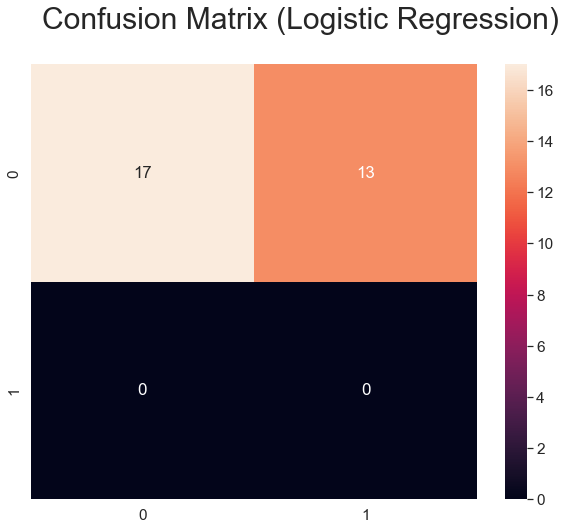

In [21]:
y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=0)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Logistic Regression)',fontsize=30)
# plt.savefig("./ConfusionMatrix_LogRegNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 

print("---------------------------------------------------------------------")
print("Accuracy of Logistic Regression Classifier :", accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------")
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("---------------------------------------------------------------------")

#### Neural Network 2 (Decision Trees)

The basic architecture of neural network based on decision tree. Its compilation and evaluation on the test set.

------------------------------------------------------------
Accuracy of Decision Tree Classifier : 0.5333333333333333
------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.38      0.42        13
           0       0.58      0.65      0.61        17

    accuracy                           0.53        30
   macro avg       0.52      0.52      0.51        30
weighted avg       0.53      0.53      0.53        30

------------------------------------------------------------


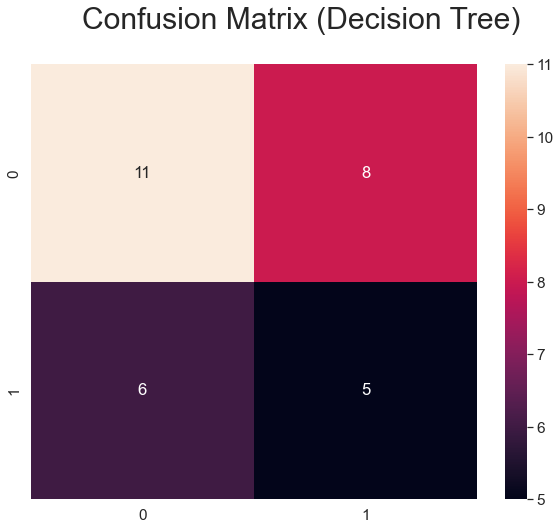

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
y_score = clf.fit(X_train, y_train).predict(X_test)

cm = confusion_matrix(y_score, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Decision Tree)',fontsize=30)
# plt.savefig("./ConfusionMatrix_DecTreeNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
print("------------------------------------------------------------")
print("Accuracy of Decision Tree Classifier :", accuracy_score(y_test, y_score))
print("------------------------------------------------------------")
matrix = classification_report(y_test,y_score,labels=[1,0])
print('Classification report : \n',matrix)
print("------------------------------------------------------------")

#### Neural Network 3 (MLP Classifier)

The basic architecture of neural network based on MLP Classifier. Its compilation and evaluation on the test set.

--------------------------------------------------------------
Accuracy of MLPClassifier : 0.36666666666666664
--------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.12      0.08      0.10        13
           0       0.45      0.59      0.51        17

    accuracy                           0.37        30
   macro avg       0.29      0.33      0.30        30
weighted avg       0.31      0.37      0.33        30

--------------------------------------------------------------


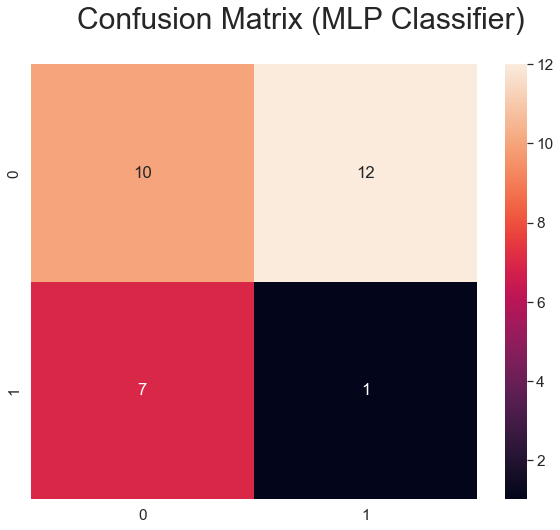

In [34]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (MLP Classifier)',fontsize=30)
# plt.savefig("./ConfusionMatrix_MLPClassNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
print("--------------------------------------------------------------")
print("Accuracy of MLPClassifier :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------")

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("--------------------------------------------------------------")

#### Neural Network 4 (Random Forest)

The basic architecture of neural network based on random forest. Its compilation and evaluation on the test set.

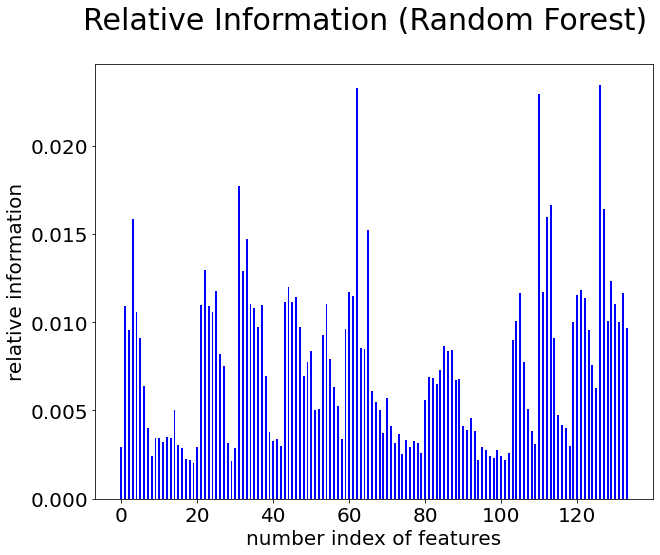

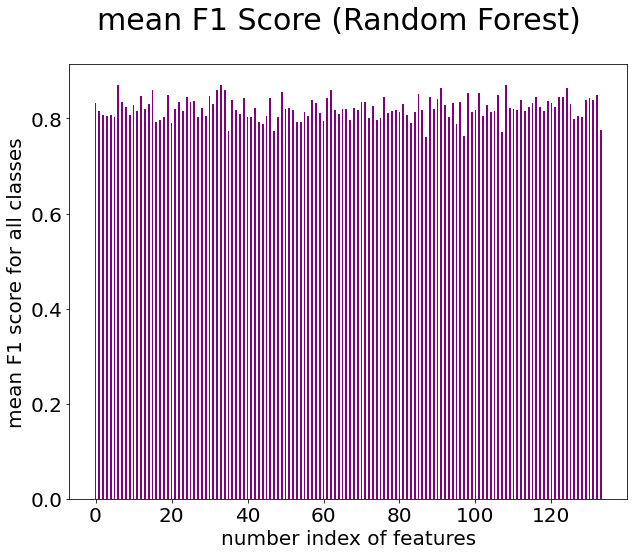

-----------------------------------------------------------
Accuracy of Random Forest Classifier :  0.5333333333333333
-----------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.38      0.42        13
           0       0.58      0.65      0.61        17

    accuracy                           0.53        30
   macro avg       0.52      0.52      0.51        30
weighted avg       0.53      0.53      0.53        30

-----------------------------------------------------------


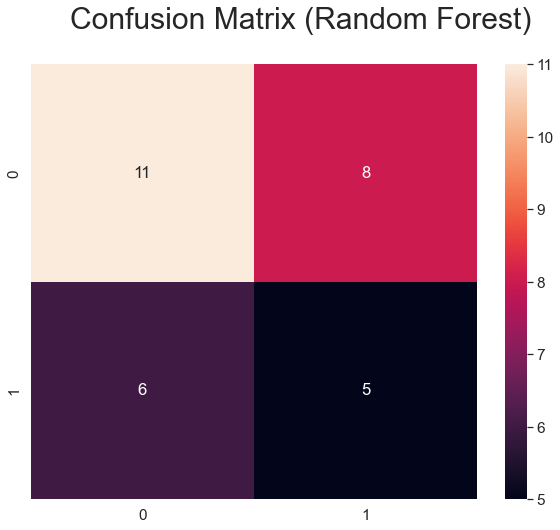

In [10]:
n_trees = 1000
rf = RandomForestClassifier(n_trees)
rf.fit(X_train, y_train.values.ravel())
features = range(134)
plt_x = np.linspace(0,len(features)-1,len(features))
# print("Features sorted by their score:")
# print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
#              reverse=True))

plt.figure(figsize=(10,8))
plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xticks(plt_x)
plt.ylabel("relative information",fontsize=20)
plt.xlabel("number index of features",fontsize=20)
plt.suptitle('Relative Information (Random Forest)',fontsize=30)
# plt.savefig("./RelInform_RandForNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
plt.show()

### F1-score sweep over features
F1 = []
plt_x = np.linspace(0,134-1,134)
n_trees = 1 # set n_trees to a limiting small number to find out features' effect on constrained models
for i in range(len(features)):
    rf = RandomForestClassifier(n_trees, max_features = i+1)
    rf.fit(X_train, y_train.values.ravel())
    Y_pred = rf.predict(X_train)
    F1.append(np.mean(f1_score(y_train,Y_pred, average  = None)))
plt.figure(figsize=(10,8))
plt.bar(plt_x, F1, width=0.5, color="purple",align='center')
#plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("mean F1 score for all classes", fontsize=20)
plt.xlabel("number index of features",fontsize=20)
plt.suptitle('mean F1 Score (Random Forest)',fontsize=30)
# plt.savefig("./meanF1score_RandForNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape') 
plt.show()

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Random Forest)',fontsize=30)
# plt.savefig("./ConfusionMatrix_RandForNN_LabMeaswithtime.jpg", 
#            bbox_inches ="tight", 
#            pad_inches = 1, 
#            transparent = True, 
#            orientation ='landscape')
print("-----------------------------------------------------------")
print("Accuracy of Random Forest Classifier : ", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------")

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("-----------------------------------------------------------")